In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Notebook author:** Eric Meinhardt / emeinhardt@ucsd.edu

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Overview-&amp;-requirements" data-toc-modified-id="Overview-&amp;-requirements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overview &amp; requirements</a></span><ul class="toc-item"><li><span><a href="#About-the-dataset-and-its-format" data-toc-modified-id="About-the-dataset-and-its-format-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>About the dataset and its format</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Sanity-check-/-inventory-exploration" data-toc-modified-id="Sanity-check-/-inventory-exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sanity check / inventory exploration</a></span></li><li><span><a href="#Convert-to-UTF-8-IPA-characters" data-toc-modified-id="Convert-to-UTF-8-IPA-characters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Convert to UTF-8 IPA characters</a></span><ul class="toc-item"><li><span><a href="#Write-to-file" data-toc-modified-id="Write-to-file-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Write to file</a></span></li><li><span><a href="#Code-to-read-it-back-in" data-toc-modified-id="Code-to-read-it-back-in-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Code to read it back in</a></span></li></ul></li><li><span><a href="#Adding-extra-fields" data-toc-modified-id="Adding-extra-fields-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adding extra fields</a></span><ul class="toc-item"><li><span><a href="#Stimulus-equivalence-classes...and-checking-assumptions-about-preceding-contexts" data-toc-modified-id="Stimulus-equivalence-classes...and-checking-assumptions-about-preceding-contexts-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Stimulus equivalence classes...and checking assumptions about preceding contexts</a></span></li><li><span><a href="#Constructing-a-maximal,-segmental+prosodic-stimulus-string" data-toc-modified-id="Constructing-a-maximal,-segmental+prosodic-stimulus-string-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Constructing a maximal, segmental+prosodic stimulus string</a></span></li><li><span><a href="#Adding-at-a-glance-readable-representations-of-the-stimulus-context-/-complete-stimulus" data-toc-modified-id="Adding-at-a-glance-readable-representations-of-the-stimulus-context-/-complete-stimulus-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Adding at-a-glance readable representations of the stimulus context / complete stimulus</a></span></li><li><span><a href="#Write-to-file-/-read-back-in" data-toc-modified-id="Write-to-file-/-read-back-in-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Write to file / read back in</a></span></li></ul></li></ul></div>

# Overview & requirements

Q: What is all this? 

A: A Jupyter notebook documenting basic processing of the diphone confusion matrices from Warner, McQueen, & Cutler (2014) for my research.

Q: What is necessary to execute it/recreate it?

A: At a high level, I am running Python 3.6.5, Jupyter Notebook 5.5.0, and otherwise Anaconda 5.2. More specifically, this notebook assumes there is a copy of the dataset and annotations available from http://www.u.arizona.edu/~nwarner/WarnerMcQueenCutler.html in the current working directory.

Q: What are the "output" files produced by this notebook?

A: 
1. A version of the input data file at http://www.u.arizona.edu/~nwarner/WarnerMcQueenCutler.html with all symbols converted to UTF-8 IPA symbols and with no other changes. 
    
    - This file is "diphones-raw-data-IPA.csv".
    
2. An extension of "diphones-raw-data-IPA.csv" that adds some fields useful for analysis by way of describing the following segmental context ('suffix') of the stimulus for every trial and the prosodic structure of every trial's stimulus.

In [2]:
%ls diphones-raw-data.csv

diphones-raw-data.csv


## About the dataset and its format

Each row corresponds to data collected about a subject at a gate in a diphone. I am perhaps most interested in the following columns:

    CorrAns1
    CorrAns2
    Resp1
    Resp2

but almost entirely for rows where
    gates 3 and 6 are involved



# Import data

In [3]:
import csv

In [4]:
def getDiphoneGatingTrials(filename, print_fields = True):
    '''
    Opens filename in the current working directory and returns the trials as a 
    list of dictionaries, plus the fieldnames in the order present in the file.
    '''
    diphone_fields = []
    diphoneTrials = []
    diphoneDataInFilename = filename
    with open(diphoneDataInFilename, newline='') as csvfile:
        my_reader = csv.DictReader(csvfile, delimiter='\t')
        diphone_fields = my_reader.fieldnames
        if print_fields:
            print("fieldnames: {0}".format(diphone_fields))
        for row in my_reader:
            #print(row)
            diphoneTrials.append(row)
    return {'trials': diphoneTrials, 'fields':diphone_fields}

def writeProcessedDataToCSV(theTrials, theFieldnames, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, delimiter='\t',fieldnames=theFieldnames)
        writer.writeheader()
        writer.writerows(theTrials)

In [5]:
the_filename = 'diphones-raw-data.csv'
# the_fields = ['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 
#               'seg1_stress', 'seg2_stress','CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 
#               'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data','replacedSeg2Data']


file_data = getDiphoneGatingTrials(the_filename)
rows = file_data['trials']
the_fields = file_data['fields']
len(rows)

fieldnames: ['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 'seg1_stress', 'seg2_stress', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data', 'replacedSeg2Data']


269280

In [6]:
rows[0]

OrderedDict([('Subject', '1'),
             ('Diph_num', '1'),
             ('Diph_name', 'CC'),
             ('Sylltype', 'CC'),
             ('SoundFile', '0001_CC_CC-g1-beeped.wav'),
             ('Prec_context', 'ah'),
             ('gate', '1'),
             ('four_gate', '0'),
             ('seg1_stress', '2'),
             ('seg2_stress', '2'),
             ('CorrAns1', 'ch'),
             ('CorrAns2', 'ch'),
             ('Resp1', 'ch'),
             ('Resp2', 't'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '0'),
             ('Prec_context_binary', '1'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

Great! Now we've got data.

# Sanity check / inventory exploration

Questions to answer:
 - What sound symbols are actually in the data at hand? 
 - Does this match what the paper/supplement says? Do I have the right paper/supplement? 
 - Have I inadvertently introduced errors?

In [7]:
sound_fields = ['Prec_context', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2']

In [8]:
def project_dict(the_dict, keys_to_keep):
    new_dict = {key:the_dict[key] for key in the_dict.keys() if key in keys_to_keep}
    return new_dict
project_dict({'Name':'Joe','ID':123,'Job':'clerk'},['Job','ID'])

{'ID': 123, 'Job': 'clerk'}

In [9]:
soundsInDiphoneMatrix = set()
def getSounds(row):
    return project_dict(row, sound_fields).values()
soundsByRow = list(map(getSounds, rows))
soundsByRow[:10]

[dict_values(['ah', 'ch', 'ch', 'ch', 't']),
 dict_values(['ah', 'ch', 'ch', 'uh', 't']),
 dict_values(['ah', 'ch', 'ch', 't', 't']),
 dict_values(['ah', 'ch', 'ch', 't', 't']),
 dict_values(['ah', 'ch', 'ch', 'k', 't']),
 dict_values(['ah', 'ch', 'ch', 't', 'uu']),
 dict_values(['ah', 'ch', 'ch', 't', 'uh']),
 dict_values(['ah', 'ch', 'ch', 't', 'k']),
 dict_values(['ah', 'ch', 'ch', 't', 'ch']),
 dict_values(['ah', 'ch', 'ch', 'ch', 'h'])]

In [10]:
for eachSoundSet in soundsByRow:
    soundsInDiphoneMatrix.update(eachSoundSet)
print(soundsInDiphoneMatrix)
print(len(soundsInDiphoneMatrix))

{'f', 'x', 'ow', 'er', 'y', 'r', 'zh', 'sh', ' ', 'g', 'oh', 'z', 'uu', 'ch', 'ih', 'F', 'ahb', 'd', 'b', 's', 'th', 'm', 'j', 'X', 'h', 't', 'ee', 'k', 'p', 'ah', 'aye', 'l', 'dh', 'n', 'w', 'ng', 'v', 'ay', 'uh', 'eh', 'oo', 'oy', 'ae', 'L'}
44


In [11]:
#Relevant:
# https://www.wikiwand.com/en/IPA_Extensions
# http://www.phon.ucl.ac.uk/home/wells/ipa-unicode.htm
# http://westonruter.github.io/ipa-chart/keyboard/
# https://docs.python.org/3/howto/unicode.html
# http://stackoverflow.com/questions/33583485/ipa-to-arpabet-python
# http://unicode-table.com/en/#control-character

#Demonstration of unicode and Python playing nice
print("\u0278") 
print("ɸ")
print("ɸ" == "\u0278")

ɸ
ɸ
True


In [12]:
# arpabet = ['AO','AA','IY','UW','EH','IH','UH','AH','AX','AE','EY','AY','OW','AW','OY','ER','P','B','T','D','K','G','CH','JH','F','V','TH','DH','S','Z','SH','ZH','HH','M','EM','N','EN','NG','ENG','L','EL','R','DX','NX','Y','W','Q']

# Commented out lines indicate symbols in the diphone gating data (and their corresponding IPA symbols) that are not in the inventory used by Warner et al.  
diphoneUnicodeIPArelation = set([ \
# ('AO', 'ɔ'), #Speaker for Warner et al is from Arizona -- ɔ is not in her inventory
(' ', ' '),
# ('ahb', 'ab'),
('ahb', 'ɑb'),
# ('ah', 'a'), #contrary to the raw dataset explanation, this is the low *back* vowel resulting from the cot-caught merger, not the low *front* vowel (IPA 'a') that some diphthongs start with...
('ah', 'ɑ'),
('ee', 'i'),
('oo', 'u'),
('eh', 'ɛ'),
('ih', 'ɪ'),
('uu', 'ʊ'),
('uh', 'ʌ'),
('x', 'ə'),
('ae', 'æ'),
('ay', 'eɪ'),
('aye', 'aɪ'),
('oh', 'oʊ'),
('ow', 'aʊ'),
('oy', 'ɔɪ'),
('er', 'ɚ'),     # two symbols mapping to the same sound - unstressed r-colored schwa
('X', 'ɚ'),      # two symbols mapping to the same sound - stressed r-colored schwa
('p', 'p'),
('b', 'b'),
('t', 't'),
('d', 'd'),
('k', 'k'),
('g', 'g'),
('ch', 'tʃ'),
('j', 'dʒ'),
('f', 'f'),
('v', 'v'),
('th', 'θ'),
('dh', 'ð'),
('s', 's'),
('z', 'z'),
('sh', 'ʃ'),
('zh', 'ʒ'),
('h', 'h'),
('m', 'm'),
# ('EM', 'm̩'),   #
('n', 'n'),
# ('EN', 'n̩'),   #
('ng', 'ŋ'),
# ('ENG', 'ŋ̩'),  #
('l', 'l'),
('L', 'l̩'),
('r', 'r'),
('F', 'ɾ'),
# ('NX', 'ɾ̃'),   #
('y', 'j'),
('w', 'w'),
# ('Q', 'ʔ')     #
])
print(diphoneUnicodeIPArelation) 
print(len(diphoneUnicodeIPArelation))
def diphoneToUnicodeIPA(diphoneSymbol):
    mapping = dict(diphoneUnicodeIPArelation)
    #print(mapping)
    return mapping[diphoneSymbol]
print(diphoneToUnicodeIPA('th'))
def invertMapping(mydict): 
    return dict([[val, key] for key,val in mydict.items()])
def unicodeIPAToDiphone(unicodeIPAsymbol):
    return invertMapping( dict(diphoneUnicodeIPArelation) )[unicodeIPAsymbol]
print(unicodeIPAToDiphone('θ'))

{('aye', 'aɪ'), (' ', ' '), ('k', 'k'), ('h', 'h'), ('r', 'r'), ('y', 'j'), ('uh', 'ʌ'), ('x', 'ə'), ('p', 'p'), ('ow', 'aʊ'), ('L', 'l̩'), ('oy', 'ɔɪ'), ('X', 'ɚ'), ('F', 'ɾ'), ('er', 'ɚ'), ('t', 't'), ('uu', 'ʊ'), ('ah', 'ɑ'), ('f', 'f'), ('sh', 'ʃ'), ('m', 'm'), ('b', 'b'), ('s', 's'), ('d', 'd'), ('ahb', 'ɑb'), ('n', 'n'), ('ng', 'ŋ'), ('zh', 'ʒ'), ('ih', 'ɪ'), ('dh', 'ð'), ('j', 'dʒ'), ('ee', 'i'), ('ch', 'tʃ'), ('eh', 'ɛ'), ('z', 'z'), ('oh', 'oʊ'), ('g', 'g'), ('w', 'w'), ('l', 'l'), ('th', 'θ'), ('oo', 'u'), ('ae', 'æ'), ('v', 'v'), ('ay', 'eɪ')}
44
θ
th


If the expression below evaluates to 'True', it means that every transcribed sound observed in the diphone data at hand is, in fact, documented in Table 1 (pp. 2-3) of http://www.u.arizona.edu/~nwarner/Raw_data_explanation.pdf and therefore in the relation defined above.

If it evaluates to 'False', it either means that there are some undocumented transcribed sounds or that I'm also capturing some strings that are not 'single sounds' as I've defined them above.

In [13]:
knownDiphoneSymbols = list(map(lambda pair: pair[0], diphoneUnicodeIPArelation))
all(list( map(lambda diphoneSound: diphoneSound in knownDiphoneSymbols, 
               soundsInDiphoneMatrix) ))

True

Huzzah. Now we can convert characters to UTF-8 IPA symbols.

# Convert to UTF-8 IPA characters

In [14]:
# This is just a functional version of calling the 'update' method on a dictionary
def edit_dict(the_dict, the_key, the_new_value):
    the_dict.update({the_key: the_new_value})
    return the_dict

In [15]:
print(sound_fields)

['Prec_context', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2']


In [16]:
def IPAify_field(the_dict, fieldname):
    if fieldname in sound_fields:
        return diphoneToUnicodeIPA( the_dict[fieldname] )
    return the_dict[fieldname]
def IPAify_row(the_dict):
    return {k:IPAify_field(the_dict,k) for k in the_dict.keys()}

In [17]:
rows[0]

OrderedDict([('Subject', '1'),
             ('Diph_num', '1'),
             ('Diph_name', 'CC'),
             ('Sylltype', 'CC'),
             ('SoundFile', '0001_CC_CC-g1-beeped.wav'),
             ('Prec_context', 'ah'),
             ('gate', '1'),
             ('four_gate', '0'),
             ('seg1_stress', '2'),
             ('seg2_stress', '2'),
             ('CorrAns1', 'ch'),
             ('CorrAns2', 'ch'),
             ('Resp1', 'ch'),
             ('Resp2', 't'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '0'),
             ('Prec_context_binary', '1'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In [18]:
rows[0].keys()

odict_keys(['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 'seg1_stress', 'seg2_stress', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data', 'replacedSeg2Data'])

In [19]:
rows[0]['Resp1']

'ch'

In [20]:
IPAify_field(rows[0], 'Resp1')

'tʃ'

In [21]:
IPAify_row(rows[0])

{'Subject': '1',
 'Diph_num': '1',
 'Diph_name': 'CC',
 'Sylltype': 'CC',
 'SoundFile': '0001_CC_CC-g1-beeped.wav',
 'Prec_context': 'ɑ',
 'gate': '1',
 'four_gate': '0',
 'seg1_stress': '2',
 'seg2_stress': '2',
 'CorrAns1': 'tʃ',
 'CorrAns2': 'tʃ',
 'Resp1': 'tʃ',
 'Resp2': 't',
 'Seg1Accur': '1',
 'Seg2Accur': '0',
 'Prec_context_binary': '1',
 'wrong_preccontext': ' ',
 'replacedSeg1Data': ' ',
 'replacedSeg2Data': ' '}

In [22]:
#Let's check rows[0] again to make sure IPAify_row doesn't change the old row
rows[0]

OrderedDict([('Subject', '1'),
             ('Diph_num', '1'),
             ('Diph_name', 'CC'),
             ('Sylltype', 'CC'),
             ('SoundFile', '0001_CC_CC-g1-beeped.wav'),
             ('Prec_context', 'ah'),
             ('gate', '1'),
             ('four_gate', '0'),
             ('seg1_stress', '2'),
             ('seg2_stress', '2'),
             ('CorrAns1', 'ch'),
             ('CorrAns2', 'ch'),
             ('Resp1', 'ch'),
             ('Resp2', 't'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '0'),
             ('Prec_context_binary', '1'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In [23]:
rows_IPA = list(map(IPAify_row, rows))
rows_IPA[:10]

[{'Subject': '1',
  'Diph_num': '1',
  'Diph_name': 'CC',
  'Sylltype': 'CC',
  'SoundFile': '0001_CC_CC-g1-beeped.wav',
  'Prec_context': 'ɑ',
  'gate': '1',
  'four_gate': '0',
  'seg1_stress': '2',
  'seg2_stress': '2',
  'CorrAns1': 'tʃ',
  'CorrAns2': 'tʃ',
  'Resp1': 'tʃ',
  'Resp2': 't',
  'Seg1Accur': '1',
  'Seg2Accur': '0',
  'Prec_context_binary': '1',
  'wrong_preccontext': ' ',
  'replacedSeg1Data': ' ',
  'replacedSeg2Data': ' '},
 {'Subject': '2',
  'Diph_num': '1',
  'Diph_name': 'CC',
  'Sylltype': 'CC',
  'SoundFile': '0001_CC_CC-g1-beeped.wav',
  'Prec_context': 'ɑ',
  'gate': '1',
  'four_gate': '0',
  'seg1_stress': '2',
  'seg2_stress': '2',
  'CorrAns1': 'tʃ',
  'CorrAns2': 'tʃ',
  'Resp1': 'ʌ',
  'Resp2': 't',
  'Seg1Accur': '0',
  'Seg2Accur': '0',
  'Prec_context_binary': '1',
  'wrong_preccontext': ' ',
  'replacedSeg1Data': ' ',
  'replacedSeg2Data': ' '},
 {'Subject': '3',
  'Diph_num': '1',
  'Diph_name': 'CC',
  'Sylltype': 'CC',
  'SoundFile': '0001_CC_C

## Write to file

In [24]:
the_fields

['Subject',
 'Diph_num',
 'Diph_name',
 'Sylltype',
 'SoundFile',
 'Prec_context',
 'gate',
 'four_gate',
 'seg1_stress',
 'seg2_stress',
 'CorrAns1',
 'CorrAns2',
 'Resp1',
 'Resp2',
 'Seg1Accur',
 'Seg2Accur',
 'Prec_context_binary',
 'wrong_preccontext',
 'replacedSeg1Data',
 'replacedSeg2Data']

In [25]:
filename_out_stem = 'diphones-raw-data-IPA'
filename_out = filename_out_stem + '.csv'

In [26]:
writeProcessedDataToCSV(rows_IPA, the_fields, filename_out)

In [27]:
%pwd

'/mnt/cube/home/AD/emeinhar/wr'

In [28]:
%ls diphones-raw-data*

diphones-raw-data.csv  diphones-raw-data-IPA.csv


## Code to read it back in

In [29]:
the_filename = 'diphones-raw-data-IPA.csv'

ipa_file_data_in = getDiphoneGatingTrials(the_filename)
rows_IPA_in = ipa_file_data_in['trials']
the_fields = ipa_file_data_in['fields']

print(len(rows_IPA_in))
print(rows_IPA_in[0])
print(the_fields)
print(rows_IPA_in[0].keys())

fieldnames: ['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 'seg1_stress', 'seg2_stress', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data', 'replacedSeg2Data']
269280
OrderedDict([('Subject', '1'), ('Diph_num', '1'), ('Diph_name', 'CC'), ('Sylltype', 'CC'), ('SoundFile', '0001_CC_CC-g1-beeped.wav'), ('Prec_context', 'ɑ'), ('gate', '1'), ('four_gate', '0'), ('seg1_stress', '2'), ('seg2_stress', '2'), ('CorrAns1', 'tʃ'), ('CorrAns2', 'tʃ'), ('Resp1', 'tʃ'), ('Resp2', 't'), ('Seg1Accur', '1'), ('Seg2Accur', '0'), ('Prec_context_binary', '1'), ('wrong_preccontext', ' '), ('replacedSeg1Data', ' '), ('replacedSeg2Data', ' ')])
['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 'seg1_stress', 'seg2_stress', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 'Prec_context_binary', 'wrong_preccontext

# Adding extra fields

Some plausibly handy fields for analysis: 
1. A single "stimulusSeg" field combining the (correct) preceding segmental context, the correct diphone segments (including boundaries), and the trailing segmental context (based on the text of Smits et al. 2003 and Warner et al 2014) could plausibly be convenient.
2. A single "stimulusWProsody" field with an accurate representation of the total segmental *and* prosodic structure of the stimulus for a given trial could be useful.
3. A pair of "prefixSeg" and  "prefixWStress" fields with accurate representations (minus syllable boundaries) of the preceding context of the stimulus for a given trial.
4. A pair of "diphoneInSeg"/"diphoneInWStress and "diphoneOutSeg"/"diphoneOutWStress" fields (with and without vowel stress information) combining CorrAns1+CorrAns2 and Resp1+Resp2 would plausibly also be convenient.
3. A single "suffix" field indicating the true following environment of the stimulus for any given trial could be useful.

## Stimulus equivalence classes...and checking assumptions about preceding contexts

Based on Smits et al. (2003) and Warner et al. (2014): For any trial, the presence (or type) of preceding context, the diphone syllable type, and the diphone stress fields contain more than enough information to exactly calculate the following context and the prosodic structure of the stimulus for that trial. Specifically, there are 14 cases:

In [30]:
def getFeatures(row):
    return (row['Sylltype'], row['seg1_stress'], row['seg2_stress'], row['Prec_context_binary'])

validClasses = set([('CV','2','1','0'), ('CV','2','1','1'), ('CV','2','0','0'), ('CV','2','0','1'), 
                    ('VC','1','2','0'), ('VC','1','2','1'), ('VC','0','2','0'), ('VC','0','2','1'), 
                    ('CC','2','2','0'), ('CC','2','2','1'), 
                    ('VV','1','0','1'), ('VV','0','1','1'), ('VV','1','1','1'), ('VV','0','0','1')])

def getCaseDescription(featuresOfRow):
    class_switch = {
        ('CV','2','1','0'):"CV   stressed no-prec-context",
        ('CV','2','1','1'):"CV   stressed    prec-context",
        ('CV','2','0','0'):"CV unstressed no-prec-context",
        ('CV','2','0','1'):"CV unstressed    prec-context",
        ('VC','1','2','0'):"VC   stressed no-prec-context",
        ('VC','1','2','1'):"VC   stressed    prec-context",
        ('VC','0','2','0'):"VC unstressed no-prec-context",
        ('VC','0','2','1'):"VC unstressed    prec-context",
        ('CC','2','2','0'):"CC  no-prec-context = CC is legal onset",
        ('CC','2','2','1'):"CC  prec-context = CC is not a legal onset",
        ('VV','1','0','1'):"VV   stressed unstressed prec-context",
        ('VV','0','1','1'):"VV unstressed   stressed prec-context",
        ('VV','1','1','1'):"VV   stressed   stressed prec-context",
        ('VV','0','0','1'):"VV unstressed unstressed prec-context"
    }
    return class_switch[featuresOfRow]

classes = list(range(14))

def classify(row):
    stimulusClass = getFeatures(row)
    class_switch =  {
        ('CV','2','1','0'):0,  #CV stressed   no-prec-context
        ('CV','2','1','1'):1,  #"         "      prec-context
        ('CV','2','0','0'):2,  #CV unstressed no-prec-context
        ('CV','2','0','1'):3,  #"           "    prec-context
        ('VC','1','2','0'):4,  #VC stressed   no-prec-context
        ('VC','1','2','1'):5,  #"         "      prec-context
        ('VC','0','2','0'):6,  #VC unstressed no-prec-context
        ('VC','0','2','1'):7,  #"           "    prec-context
        ('CC','2','2','0'):8,  #CC            no-prec-context = CC is     a legal onset
        ('CC','2','2','1'):9,  #CC               prec-context = CC is not a legal onset
        ('VV','1','0','1'):10, #VV   stressed unstressed
        ('VV','0','1','1'):11, #VV unstressed   stressed
        ('VV','1','1','1'):12, #VV   stressed   stressed
        ('VV','0','0','1'):13  #VV unstressed unstressed
    }
    return class_switch[stimulusClass]

The expressions below will evaluate to true iff every trial ('row') is classified by 'classify'.

In [31]:
all([classify(row) in classes for row in rows_IPA_in])

True

In [32]:
all([getFeatures(row) in validClasses for row in rows_IPA_in])

True

Good - there are no unclassifiable trials (rows).)

For edification and sanity-checking, let's sort all trials into equivalence classes defined by 'classify' and see how many are in each category.

In [33]:
equiv_classes = {c:[row for row in rows_IPA_in if c == classify(row)] for c in classes}
class_counts = {c:len(equiv_classes[c]) for c in classes}
print("Counts:")
for k,v in class_counts.items():
    print("{0}: {1}".format(k,v))

total = sum(class_counts.values())
print("\n%:")
for k,v in class_counts.items():
    print("{0}: {1}".format(k,v/total*100))

Counts:
0: 22640
1: 13080
2: 25280
3: 15000
4: 12600
5: 26040
6: 12600
7: 26520
8: 2000
9: 52920
10: 14040
11: 15720
12: 14520
13: 16320

%:
0: 8.407605466428995
1: 4.857397504456328
2: 9.38799762329174
3: 5.570409982174688
4: 4.679144385026738
5: 9.670231729055258
6: 4.679144385026738
7: 9.848484848484848
8: 0.7427213309566251
9: 19.6524064171123
10: 5.213903743315508
11: 5.837789661319073
12: 5.392156862745098
13: 6.0606060606060606


To check that I correctly understood the description of contexts, let's calculate a property of the context (preceding context) that is already explicitly given and see if/when we get something wrong:

First let's check some examples:

In [34]:
from random import choice

In [35]:
class_examples = {c:choice(equiv_classes[c]) for c in classes}
class_examples

{0: OrderedDict([('Subject', '26'),
              ('Diph_num', '757'),
              ('Diph_name', 'w^'),
              ('Sylltype', 'CV'),
              ('SoundFile', '0757_w^_CV-g4-beeped.wav'),
              ('Prec_context', ' '),
              ('gate', '4'),
              ('four_gate', '0'),
              ('seg1_stress', '2'),
              ('seg2_stress', '1'),
              ('CorrAns1', 'w'),
              ('CorrAns2', 'ʌ'),
              ('Resp1', 'w'),
              ('Resp2', 'ʌ'),
              ('Seg1Accur', '1'),
              ('Seg2Accur', '1'),
              ('Prec_context_binary', '0'),
              ('wrong_preccontext', ' '),
              ('replacedSeg1Data', ' '),
              ('replacedSeg2Data', ' ')]),
 1: OrderedDict([('Subject', '15'),
              ('Diph_num', '737'),
              ('Diph_name', 'zu'),
              ('Sylltype', 'CV'),
              ('SoundFile', '0737_zu_CV-g5-beeped.wav'),
              ('Prec_context', 'ɑ'),
              ('gate', '5'),
    

In [36]:
def expectedPrefix(row):
    lowBackVowel = 'ɑ'
    diphoneClass = (row['Sylltype'], row['seg1_stress'], row['seg2_stress'], row['Prec_context_binary'])
    prefix_switch =  {
        ('CV','2','1','0'):' ',                 # CV stressed   no-prec-context
        ('CV','2','1','1'):lowBackVowel,        # "         "      prec-context
        ('CV','2','0','0'):' ',                 # CV unstressed no-prec-context
        ('CV','2','0','1'):lowBackVowel,        # "           "    prec-context
        ('VC','1','2','0'):' ',                 # VC stressed   no-prec-context
        ('VC','1','2','1'):'b',                 # "         "      prec-context
        ('VC','0','2','0'):' ',                 # VC unstressed no-prec-context
        ('VC','0','2','1'):'b',                 # "           "    prec-context
        ('CC','2','2','0'):' ',                 # CC            no-prec-context = CC is     a legal onset
        ('CC','2','2','1'):lowBackVowel,        # CC               prec-context = CC is not a legal onset
        ('VV','1','0','1'):'b',                 # VV   stressed unstressed
        ('VV','0','1','1'):'b',                 # VV unstressed   stressed
        ('VV','1','1','1'):'b',                 # VV   stressed   stressed
        ('VV','0','0','1'):lowBackVowel + 'b'   # VV unstressed unstressed
    }
    expected = prefix_switch[diphoneClass]
    actual = row['Prec_context']
    return {'Expected prefix': expected, 'Actual prefix': actual, 'Same?': expected == actual}

In [37]:
{c:expectedPrefix(class_examples[c]) for c in class_examples}

{0: {'Expected prefix': ' ', 'Actual prefix': ' ', 'Same?': True},
 1: {'Expected prefix': 'ɑ', 'Actual prefix': 'ɑ', 'Same?': True},
 2: {'Expected prefix': ' ', 'Actual prefix': ' ', 'Same?': True},
 3: {'Expected prefix': 'ɑ', 'Actual prefix': 'ɑ', 'Same?': True},
 4: {'Expected prefix': ' ', 'Actual prefix': ' ', 'Same?': True},
 5: {'Expected prefix': 'b', 'Actual prefix': 'b', 'Same?': True},
 6: {'Expected prefix': ' ', 'Actual prefix': ' ', 'Same?': True},
 7: {'Expected prefix': 'b', 'Actual prefix': 'b', 'Same?': True},
 8: {'Expected prefix': ' ', 'Actual prefix': ' ', 'Same?': True},
 9: {'Expected prefix': 'ɑ', 'Actual prefix': 'ɑ', 'Same?': True},
 10: {'Expected prefix': 'b', 'Actual prefix': 'b', 'Same?': True},
 11: {'Expected prefix': 'b', 'Actual prefix': 'b', 'Same?': True},
 12: {'Expected prefix': 'b', 'Actual prefix': 'b', 'Same?': True},
 13: {'Expected prefix': 'ɑb', 'Actual prefix': 'ɑb', 'Same?': True}}

Looks good. Now let's make sure *everything* is accurately classified:

In [38]:
all([expectedPrefix(row)['Same?'] for row in rows_IPA_in])

False

Hmm. How many are we getting wrong?

In [39]:
wrongClassifications = [row for row in rows_IPA_in if not expectedPrefix(row)['Same?']]
print(len(wrongClassifications))

24600


Hmmm...that's a lot of misclassified rows. Let's see what is being misclassified and how:

In [40]:
wrongClassificationsDict = [expectedPrefix(row) for row in rows_IPA_in if not expectedPrefix(row)['Same?']]
print(len(wrongClassificationsDict))

24600


In [41]:
actualPrefixes = [result['Actual prefix'] for result in wrongClassificationsDict]
expectedPrefixes = [result['Expected prefix'] for result in wrongClassificationsDict]

In [42]:
set(actualPrefixes)

{'ɑb'}

In [43]:
set(expectedPrefixes)

{'b'}

Ok. All misclassified rows are expected to have 'b' as a prefix but actually have 'ab' as a prefix.

There are 5 distinct cases when a stimulus is expected to have as prefix 'b' and exactly 1 where it's expected to have 'ab'.

In [44]:
featuresWrongClassifications = [getFeatures(row) for row in rows_IPA_in if not expectedPrefix(row)['Same?']]
len(featuresWrongClassifications)
featuresWrongClassifications

24600

[('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2', '1'),
 ('VC', '1', '2'

limit_output extension: Maximum message size of 20000 exceeded with 24010 characters

In [45]:
set(featuresWrongClassifications)

{('VC', '0', '2', '1'), ('VC', '1', '2', '1')}

In [46]:
{each:getCaseDescription(each) for each in set(featuresWrongClassifications)}

{('VC', '1', '2', '1'): 'VC   stressed    prec-context',
 ('VC', '0', '2', '1'): 'VC unstressed    prec-context'}

There is *nothing* in Smits et al. (2003), Warner et al. (2005) or the extra online information for Warner et al. (2005) that clearly suggests to me that either of these two cases *should* (under any particular conditions) have a preceding context of 'ab' rather than 'b'.

One possible (if paranoid)) explanation for why I'm seeing this is that I somehow mistakenly altered the preceding context field in the course of converting transcriptions to IPA Unicode characters. If I run the code below on the raw data and it shows that actual and expected prefixes always match, then the IPA/unicode processing is introducing errors; if they don't always match, then either the raw data are not as documented or something *else* is wrong with code above.

In [47]:
the_filename = 'diphones-raw-data.csv'
# the_fields = ['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 
#               'seg1_stress', 'seg2_stress','CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 
#               'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data','replacedSeg2Data']


file_data_raw = getDiphoneGatingTrials(the_filename)
rows_raw_data = file_data['trials']
the_fields = file_data['fields']

len(rows_raw_data)
rows_raw_data[0]

fieldnames: ['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 'seg1_stress', 'seg2_stress', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data', 'replacedSeg2Data']


269280

OrderedDict([('Subject', '1'),
             ('Diph_num', '1'),
             ('Diph_name', 'CC'),
             ('Sylltype', 'CC'),
             ('SoundFile', '0001_CC_CC-g1-beeped.wav'),
             ('Prec_context', 'ah'),
             ('gate', '1'),
             ('four_gate', '0'),
             ('seg1_stress', '2'),
             ('seg2_stress', '2'),
             ('CorrAns1', 'ch'),
             ('CorrAns2', 'ch'),
             ('Resp1', 'ch'),
             ('Resp2', 't'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '0'),
             ('Prec_context_binary', '1'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In [48]:
def expectedPrefix_raw(row_raw):
    lowBackVowel = 'ah'
    diphoneClass = getFeatures(row_raw)
    prefix_switch =  {
        ('CV','2','1','0'):' ',                 # CV stressed   no-prec-context
        ('CV','2','1','1'):lowBackVowel,        # "         "      prec-context
        ('CV','2','0','0'):' ',                 # CV unstressed no-prec-context
        ('CV','2','0','1'):lowBackVowel,        # "           "    prec-context
        ('VC','1','2','0'):' ',                 # VC stressed   no-prec-context
        ('VC','1','2','1'):'b',                 # "         "      prec-context
        ('VC','0','2','0'):' ',                 # VC unstressed no-prec-context
        ('VC','0','2','1'):'b',                 # "           "    prec-context
        ('CC','2','2','0'):' ',                 # CC            no-prec-context = CC is     a legal onset
        ('CC','2','2','1'):lowBackVowel,        # CC               prec-context = CC is not a legal onset
        ('VV','1','0','1'):'b',                 # VV   stressed unstressed
        ('VV','0','1','1'):'b',                 # VV unstressed   stressed
        ('VV','1','1','1'):'b',                 # VV   stressed   stressed
        ('VV','0','0','1'):lowBackVowel + 'b'   # VV unstressed unstressed
    }
    expected = prefix_switch[diphoneClass]
    actual = row_raw['Prec_context']
    return {'Expected prefix': expected, 'Actual prefix': actual, 'Same?': expected == actual}

In [49]:
wrongClassifications_raw = [row for row in rows_raw_data if not expectedPrefix_raw(row)['Same?']]
print(len(wrongClassifications_raw))

24600


In [50]:
wC_raw = list(map(expectedPrefix_raw, wrongClassifications_raw))
wC_raw[0:10]

[{'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False},
 {'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False},
 {'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False},
 {'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False},
 {'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False},
 {'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False},
 {'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False},
 {'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False},
 {'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False},
 {'Expected prefix': 'b', 'Actual prefix': 'ahb', 'Same?': False}]

In [51]:
set([each['Actual prefix'] for each in wC_raw])
set([each['Expected prefix'] for each in wC_raw])

{'ahb'}

{'b'}

Conclusion: This is the same number and same kind of errors as before: the earlier 'errors' were already there in the input. This means that there is, in fact, nothing wrong with my code -- just my assumptions/inferences from reading about what the preceding contexts were and how to infer them. 

Let's look at the diphones (and stress information) in the IPA version and see what logic governs these examples and what I either failed to deduce from the documentation or what is undocumented.

In [52]:
# wrongClassifications = the set of rows wrongly classified
wrongClassifications[0]

OrderedDict([('Subject', '1'),
             ('Diph_num', '1122'),
             ('Diph_name', 'Og'),
             ('Sylltype', 'VC'),
             ('SoundFile', '1122_Og_VC-g1-beeped.wav'),
             ('Prec_context', 'ɑb'),
             ('gate', '1'),
             ('four_gate', '0'),
             ('seg1_stress', '1'),
             ('seg2_stress', '2'),
             ('CorrAns1', 'ɔɪ'),
             ('CorrAns2', 'g'),
             ('Resp1', 'ɔɪ'),
             ('Resp2', 't'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '0'),
             ('Prec_context_binary', '1'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In [53]:
def inspect_WC_row(row):
    fieldsOfInterest = ['Sylltype', 'seg1_stress', 'seg2_stress', 'Prec_context_binary', 'Prec_context', 'CorrAns1', 'CorrAns2']
    return {k:row[k] for k in fieldsOfInterest}
inspect_WC_row(wrongClassifications[0])

{'Sylltype': 'VC',
 'seg1_stress': '1',
 'seg2_stress': '2',
 'Prec_context_binary': '1',
 'Prec_context': 'ɑb',
 'CorrAns1': 'ɔɪ',
 'CorrAns2': 'g'}

Why would

    {('VC', '0', '2', '1'): 'VC unstressed prec-context',
     ('VC', '1', '2', '1'): 'VC stressed prec-context'}

items have as preceding context

    'ɑb'

instead of

    'b'

?

Questions whose answer *might* help: 
 - how many VC021 items are there total vs. how many such items are in WC?
 - how many VC121 items are there total vs. how many such items are in WC?
 
(compare with proportions in tables in Smits et al., 2003.)
If total number = WC, then just edit the classifications you expect and move on.

In [54]:
vc021 = [row for row in rows_IPA_in if getFeatures(row) == ('VC', '0', '2', '1')]
print(len(vc021))
vc021wc = [row for row in vc021 if row in wrongClassifications]
print(len(vc021wc))
vc021correct = [row for row in vc021 if row not in wrongClassifications]

26520
12480


In [55]:
vc121 = [row for row in rows_IPA_in if getFeatures(row) == ('VC', '1', '2', '1')]
print(len(vc121))
vc121wc = [row for row in vc121 if row in wrongClassifications]
print(len(vc121wc))
vc121correct = [row for row in vc121 if row not in wrongClassifications]

26040
12120


In [56]:
set([row['Prec_context'] for row in vc021correct])
set([row['Prec_context'] for row in vc021wc])
set([row['Prec_context'] for row in vc121correct])
set([row['Prec_context'] for row in vc121wc])

{'b'}

{'ɑb'}

{'b'}

{'ɑb'}

About half of each (of VC021 and VC121 items) have an unexpected prefix, and this is *not* what Table III of Smits et al. (2003) gives me any expectation of.

Is this predictable on the basis of the segments in the diphone?

In [57]:
set([row['CorrAns1'] for row in vc021correct])
set([row['CorrAns1'] for row in vc021wc])
set([row['CorrAns1'] for row in vc121correct])
set([row['CorrAns1'] for row in vc121wc])

{'aɪ', 'aʊ', 'eɪ', 'i', 'oʊ', 'u', 'æ', 'ɑ', 'ɔɪ', 'ə', 'ɚ', 'ɛ', 'ɪ', 'ʊ'}

{'aɪ', 'aʊ', 'eɪ', 'i', 'oʊ', 'u', 'æ', 'ɑ', 'ɔɪ', 'ə', 'ɚ', 'ɛ', 'ɪ', 'ʊ'}

{'aɪ', 'aʊ', 'eɪ', 'i', 'oʊ', 'u', 'æ', 'ɑ', 'ɔɪ', 'ɚ', 'ɛ', 'ɪ', 'ʊ', 'ʌ'}

{'aɪ', 'aʊ', 'eɪ', 'i', 'oʊ', 'u', 'æ', 'ɑ', 'ɔɪ', 'ɚ', 'ɛ', 'ɪ', 'ʊ', 'ʌ'}

(Here are the same results, laid out slightly more eyeballably:

    {'ɑ', 'aɪ', 'aʊ', 'eɪ', 'i', 'oʊ', 'u', 'æ', 'ɔɪ', 'ə', 'ɚ', 'ɛ', 'ɪ', 'ʊ'}
    {'ɑ', 'aɪ', 'aʊ', 'eɪ', 'i', 'oʊ', 'u', 'æ', 'ɔɪ', 'ə', 'ɚ', 'ɛ', 'ɪ', 'ʊ'}
    {'ɑ', 'aɪ', 'aʊ', 'eɪ', 'i', 'oʊ', 'u', 'æ', 'ɔɪ', 'ʌ', 'ɚ', 'ɛ', 'ɪ', 'ʊ'}
    {'ɑ', 'aɪ', 'aʊ', 'eɪ', 'i', 'oʊ', 'u', 'æ', 'ɔɪ', 'ʌ', 'ɚ', 'ɛ', 'ɪ', 'ʊ'}

You can see that they're identical, except for the stress variation of schwa vs. wedge that you'd expect.
)

In [58]:
set([row['CorrAns2'] for row in vc021correct])
set([row['CorrAns2'] for row in vc021wc])
set([row['CorrAns2'] for row in vc121correct])
set([row['CorrAns2'] for row in vc121wc])

{'d',
 'dʒ',
 'f',
 'g',
 'h',
 'j',
 'k',
 'l',
 'm',
 'n',
 'r',
 's',
 't',
 'tʃ',
 'v',
 'w',
 'z',
 'ð',
 'ŋ',
 'ɾ',
 'ʃ',
 'ʒ',
 'θ'}

{'d',
 'dʒ',
 'f',
 'g',
 'h',
 'j',
 'k',
 'l',
 'm',
 'n',
 'r',
 's',
 't',
 'tʃ',
 'v',
 'w',
 'z',
 'ð',
 'ʃ',
 'ʒ',
 'θ'}

{'d',
 'dʒ',
 'f',
 'g',
 'h',
 'j',
 'k',
 'l',
 'm',
 'n',
 'r',
 's',
 't',
 'tʃ',
 'v',
 'w',
 'z',
 'ð',
 'ŋ',
 'ɾ',
 'ʃ',
 'ʒ',
 'θ'}

{'d',
 'dʒ',
 'f',
 'g',
 'h',
 'j',
 'k',
 'l',
 'm',
 'n',
 'r',
 's',
 't',
 'tʃ',
 'v',
 'w',
 'z',
 'ð',
 'ŋ',
 'ʃ',
 'ʒ',
 'θ'}

(Here are the same sets, laid out horizontally:
    
    {'d', 'dʒ', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'r', 's', 't', 'tʃ', 'v', 'w', 'z', 'ð', 'ŋ', 'ɾ', 'ʃ', 'ʒ', 'θ'}
    {'d', 'dʒ', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'r', 's', 't', 'tʃ', 'v', 'w', 'z', 'ð',           'ʃ', 'ʒ', 'θ'}
    {'d', 'dʒ', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'r', 's', 't', 'tʃ', 'v', 'w', 'z', 'ð', 'ŋ', 'ɾ', 'ʃ', 'ʒ', 'θ'}
    {'d', 'dʒ', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'r', 's', 't', 'tʃ', 'v', 'w', 'z', 'ð', 'ŋ',      'ʃ', 'ʒ', 'θ'}

You can see that there are only slight differences between both pairs of sets -- certainly not enough to predict anything by.
)

Nothing appears to predict this - it seems arbitrary.

In [59]:
set([row['Prec_context'] for row in vc021correct])
set([expectedPrefix(row)['Expected prefix'] for row in vc021correct])
set([row['Prec_context'] for row in vc021wc])
set([expectedPrefix(row)['Expected prefix'] for row in vc021wc])
set([row['Prec_context'] for row in vc121correct])
set([expectedPrefix(row)['Expected prefix'] for row in vc121correct])
set([row['Prec_context'] for row in vc121wc])
set([expectedPrefix(row)['Expected prefix'] for row in vc121wc])

{'b'}

{'b'}

{'ɑb'}

{'b'}

{'b'}

{'b'}

{'ɑb'}

{'b'}

I'm going to assume that for all wrongly classified VC021 stimuli (unstressed VC stimuli with a preceding context) that the preceding context is stressed, that the 'b' is part of the diphone onset rather than context coda, and that the diphone C is the onset of the following context: 'a-bV-'Ceɪ.

Similarly, I'm going to assume that for all wrongly classified VC121 stimuli (stressed VC stimuli with a preceding context) that the preceding context is unstressed, that the 'b' is part of the diphone onset rather than context coda, and that the diphone C is the onset of the following context: a-'bV-Cə.

EDIT: Correspondence with Natasha Warner (01/01/2018) confirms that this is correct. Below is a summary:

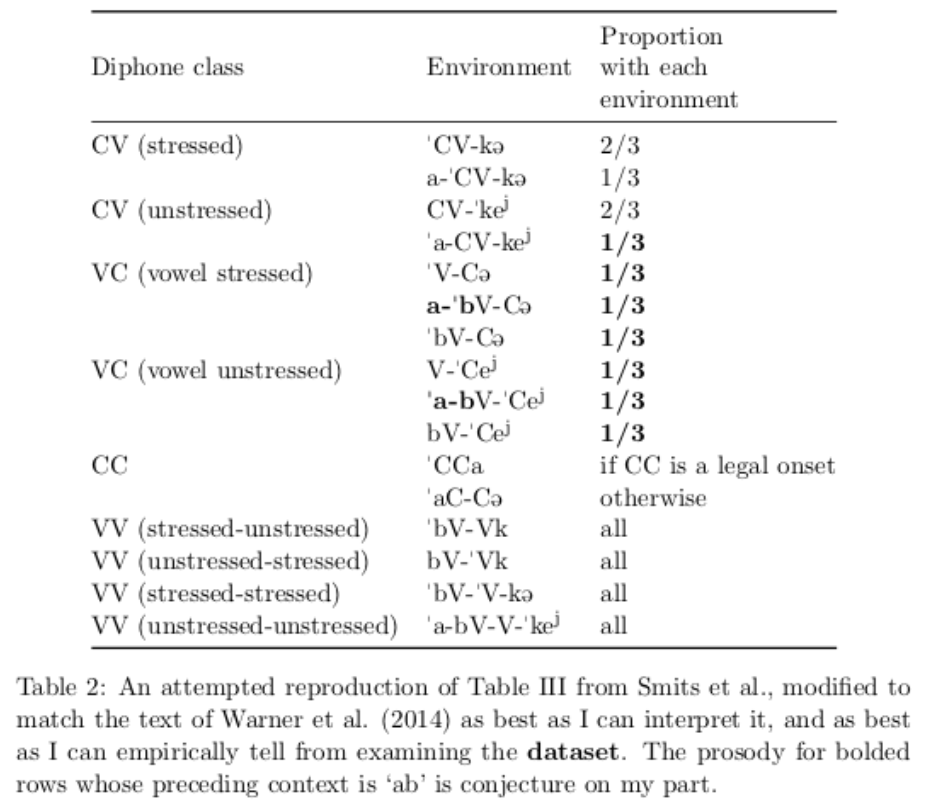

In [60]:
from IPython.display import Image
Image("tableIII.png")

Let's rewrite everything from this subsection in light of this information...

In [61]:
def getFeatures(row):
    return (row['Sylltype'], row['seg1_stress'], row['seg2_stress'], row['Prec_context_binary'], \
            row['Prec_context'], expectedPrefix(row)['Expected prefix'])

validClasses = set([
        ('CV','2','1','0', ' ' , ' '),   # CV stressed   no-prec-context
        ('CV','2','1','1', 'ɑ' , 'ɑ'),   # "         "      prec-context
        ('CV','2','0','0', ' ' , ' '),   # CV unstressed no-prec-context
        ('CV','2','0','1', 'ɑ' , 'ɑ'),   # "           "    prec-context
        ('VC','1','2','0', ' ' , ' '),   # VC stressed   no-prec-context
        ('VC','1','2','1', 'b' , 'b'),   # "         "      prec-context
        ('VC','1','2','1', 'ɑb', 'b'),   # "         "      prec-context unexpected prefix form
        ('VC','0','2','0', ' ' , ' '),   # VC unstressed no-prec-context
        ('VC','0','2','1', 'b' , 'b'),   # "           "    prec-context
        ('VC','0','2','1', 'ɑb', 'b'),   # "           "    prec-context unexpected prefix form
        ('CC','2','2','0', ' ' , ' '),   # CC            no-prec-context = CC is     a legal onset
        ('CC','2','2','1', 'ɑ' , 'ɑ'),   # CC               prec-context = CC is not a legal onset
        ('VV','1','0','1', 'b' , 'b'),   # VV   stressed unstressed
        ('VV','0','1','1', 'b' , 'b'),   # VV unstressed   stressed
        ('VV','1','1','1', 'b' , 'b'),   # VV   stressed   stressed
        ('VV','0','0','1', 'ɑb', 'ɑb')   # VV unstressed unstressed
])

def getCaseDescription(featuresOfRow):
    class_switch = {
        ('CV','2','1','0', ' ' , ' '): "CV   stressed no-prec-context",
        ('CV','2','1','1', 'ɑ' , 'ɑ'): "CV   stressed    prec-context",
        ('CV','2','0','0', ' ' , ' '): "CV unstressed no-prec-context",
        ('CV','2','0','1', 'ɑ' , 'ɑ'): "CV unstressed    prec-context",
        ('VC','1','2','0', ' ' , ' '): "VC   stressed no-prec-context",
        ('VC','1','2','1', 'b' , 'b'): "VC   stressed    prec-context",
        ('VC','1','2','1', 'ɑb', 'b'): "VC   stressed    prec-context unexpected-prefix-form",
        ('VC','0','2','0', ' ' , ' '): "VC unstressed no-prec-context",
        ('VC','0','2','1', 'b' , 'b'): "VC unstressed    prec-context",
        ('VC','0','2','1', 'ɑb', 'b'): "VC unstressed    prec-context unexpected-prefix-form",
        ('CC','2','2','0', ' ' , ' '): "CC no-stress  no-prec-context = CC is     a legal onset",
        ('CC','2','2','1', 'ɑ' , 'ɑ'): "CC no-stress     prec-context = CC is not a legal onset",
        ('VV','1','0','1', 'b' , 'b'): "VV   stressed unstressed",
        ('VV','0','1','1', 'b' , 'b'): "VV unstressed   stressed",
        ('VV','1','1','1', 'b' , 'b'): "VV   stressed   stressed",
        ('VV','0','0','1', 'ɑb', 'ɑb'):"VV unstressed unstressed"
    }
    return class_switch[featuresOfRow]

classes = list(range(16))

def classify(row):
    stimulusClass = getFeatures(row)
    class_switch =  {
        ('CV','2','1','0', ' ' , ' '):0,   # CV stressed   no-prec-context
        ('CV','2','1','1', 'ɑ' , 'ɑ'):1,   # "         "      prec-context
        ('CV','2','0','0', ' ' , ' '):2,   # CV unstressed no-prec-context
        ('CV','2','0','1', 'ɑ' , 'ɑ'):3,   # "           "    prec-context
        ('VC','1','2','0', ' ' , ' '):4,   # VC stressed   no-prec-context
        ('VC','1','2','1', 'b' , 'b'):5,   # "         "      prec-context
        ('VC','1','2','1', 'ɑb', 'b'):6,   # "         "      prec-context unexpected prefix form
        ('VC','0','2','0', ' ' , ' '):7,   # VC unstressed no-prec-context
        ('VC','0','2','1', 'b' , 'b'):8,   # "           "    prec-context
        ('VC','0','2','1', 'ɑb', 'b'):9,   # "           "    prec-context unexpected prefix form
        ('CC','2','2','0', ' ' , ' '):10,  # CC            no-prec-context = CC is     a legal onset
        ('CC','2','2','1', 'ɑ' , 'ɑ'):11,  # CC               prec-context = CC is not a legal onset
        ('VV','1','0','1', 'b' , 'b'):12,  # VV   stressed unstressed
        ('VV','0','1','1', 'b' , 'b'):13,  # VV unstressed   stressed
        ('VV','1','1','1', 'b' , 'b'):14,  # VV   stressed   stressed
        ('VV','0','0','1', 'ɑb', 'ɑb'):15  # VV unstressed unstressed
    }
    return class_switch[stimulusClass]

In [62]:
equiv_classes = {c:[row for row in rows_IPA_in if c == classify(row)] for c in classes}
class_counts = {c:len(equiv_classes[c]) for c in classes}
print("Counts:")
for k,v in class_counts.items():
    print("{0}: {1}".format(k,v))

total = sum(class_counts.values())
print("\n%:")
for k,v in class_counts.items():
    print("{0}: {1}".format(k,v/total*100))

Counts:
0: 22640
1: 13080
2: 25280
3: 15000
4: 12600
5: 13920
6: 12120
7: 12600
8: 14040
9: 12480
10: 2000
11: 52920
12: 14040
13: 15720
14: 14520
15: 16320

%:
0: 8.407605466428995
1: 4.857397504456328
2: 9.38799762329174
3: 5.570409982174688
4: 4.679144385026738
5: 5.169340463458111
6: 4.500891265597148
7: 4.679144385026738
8: 5.213903743315508
9: 4.634581105169341
10: 0.7427213309566251
11: 19.6524064171123
12: 5.213903743315508
13: 5.837789661319073
14: 5.392156862745098
15: 6.0606060606060606


In [63]:
class_examples = {c:choice(equiv_classes[c]) for c in classes}
class_examples

{0: OrderedDict([('Subject', '24'),
              ('Diph_num', '605'),
              ('Diph_name', 'hu'),
              ('Sylltype', 'CV'),
              ('SoundFile', '0605_hu_CV-g6-beeped.wav'),
              ('Prec_context', ' '),
              ('gate', '6'),
              ('four_gate', '0'),
              ('seg1_stress', '2'),
              ('seg2_stress', '1'),
              ('CorrAns1', 'h'),
              ('CorrAns2', 'u'),
              ('Resp1', 'h'),
              ('Resp2', 'u'),
              ('Seg1Accur', '1'),
              ('Seg2Accur', '1'),
              ('Prec_context_binary', '0'),
              ('wrong_preccontext', ' '),
              ('replacedSeg1Data', ' '),
              ('replacedSeg2Data', ' ')]),
 1: OrderedDict([('Subject', '20'),
              ('Diph_num', '753'),
              ('Diph_name', 'r^'),
              ('Sylltype', 'CV'),
              ('SoundFile', '0753_r^_CV-g5-beeped.wav'),
              ('Prec_context', 'ɑ'),
              ('gate', '5'),
    

## Constructing a maximal, segmental+prosodic stimulus string

'Maximal' representations should look something like \FIXME

In [64]:
def getDiphonesIn(row):
    return (row['CorrAns1'] + row['seg1_stress'], row['CorrAns2'] + row['seg2_stress'])

def getDiphonesOut(row):
    return (row['Resp1'], row['Resp2'])

def diphTupleToStringRep(diphTuple):
    return '.'.join(diphTuple)

def getDiphonesInAsStr(row):
    return diphTupleToStringRep(getDiphonesIn(row))

def getDiphonesOutAsStr(row):
    return diphTupleToStringRep(getDiphonesOut(row))

def removeConsStress(stringRep):
    return ''.join([c for c in stringRep if c != "2"])

def removeStress(stringRep):
    return ''.join([c for c in stringRep if c != "0" and c != "1" and c != "2"])

def replaceSyllableBoundaries(stringRep):
    return stringRep.replace('-','.')

def justSegments(stringRep):
    return replaceSyllableBoundaries(removeStress(stringRep))

def trimAnnotations(stringRep):
    newStringRep = stringRep[:]
    if len(stringRep) == 0:
        return stringRep
    if stringRep[0] == '.' or stringRep[0] == '-':
        newStringRep = newStringRep[1:]
    if stringRep[-1] == '.' or stringRep[-1] == '-':
        newStringRep = newStringRep[:-1]
    return newStringRep

In [65]:
class_examples

{0: OrderedDict([('Subject', '24'),
              ('Diph_num', '605'),
              ('Diph_name', 'hu'),
              ('Sylltype', 'CV'),
              ('SoundFile', '0605_hu_CV-g6-beeped.wav'),
              ('Prec_context', ' '),
              ('gate', '6'),
              ('four_gate', '0'),
              ('seg1_stress', '2'),
              ('seg2_stress', '1'),
              ('CorrAns1', 'h'),
              ('CorrAns2', 'u'),
              ('Resp1', 'h'),
              ('Resp2', 'u'),
              ('Seg1Accur', '1'),
              ('Seg2Accur', '1'),
              ('Prec_context_binary', '0'),
              ('wrong_preccontext', ' '),
              ('replacedSeg1Data', ' '),
              ('replacedSeg2Data', ' ')]),
 1: OrderedDict([('Subject', '20'),
              ('Diph_num', '753'),
              ('Diph_name', 'r^'),
              ('Sylltype', 'CV'),
              ('SoundFile', '0753_r^_CV-g5-beeped.wav'),
              ('Prec_context', 'ɑ'),
              ('gate', '5'),
    

In [66]:
my_ex = class_examples[3]
print(my_ex)

print(' ')
din = getDiphonesIn(my_ex)
print(din)
dinStr = getDiphonesInAsStr(my_ex)

print(removeConsStress( dinStr ))
print(removeStress( dinStr ))
print(justSegments( dinStr ))

print(' ')
dout = getDiphonesOut(my_ex) 
print(dout)
doutStr = getDiphonesOutAsStr(my_ex) 
print(removeStress( doutStr ))
print(justSegments( doutStr ))

OrderedDict([('Subject', '21'), ('Diph_num', '984'), ('Diph_name', 'pY'), ('Sylltype', 'CV'), ('SoundFile', '0984_pY_CV-g2-beeped.wav'), ('Prec_context', 'ɑ'), ('gate', '2'), ('four_gate', '0'), ('seg1_stress', '2'), ('seg2_stress', '0'), ('CorrAns1', 'p'), ('CorrAns2', 'aɪ'), ('Resp1', 'ʌ'), ('Resp2', 'p'), ('Seg1Accur', '0'), ('Seg2Accur', '0'), ('Prec_context_binary', '1'), ('wrong_preccontext', ' '), ('replacedSeg1Data', ' '), ('replacedSeg2Data', ' ')])
 
('p2', 'aɪ0')
p.aɪ0
p.aɪ
p.aɪ
 
('ʌ', 'p')
ʌ.p
ʌ.p


In [67]:
def getPrefixWProsody(row):
    pc = row['Prec_context']
    ep = expectedPrefix(row)['Expected prefix']
    diphoneClass = (row['Sylltype'], row['seg1_stress'], row['seg2_stress'], row['Prec_context_binary'], pc, ep)
    prefix_switch =  {
        ('CV','2','1','0', ' ', ' '):'',                                # CV stressed   no-prec-context
        ('CV','2','1','1', 'ɑ', 'ɑ'):'ɑ' + '0-',                        # "         "      prec-context
        ('CV','2','0','0', ' ', ' '):'',                                # CV unstressed no-prec-context
        ('CV','2','0','1', 'ɑ', 'ɑ'):'ɑ' + '1-',                        # "           "    prec-context
        ('VC','1','2','0', ' ', ' '):'',                                # VC stressed   no-prec-context
        ('VC','1','2','1', 'b', 'b'):'b' + '.',                         # "         "      prec-context
        ('VC','1','2','1', 'ɑb', 'b'):'0-'.join([c for c in pc]) + '.', # "         "      prec-context
        ('VC','0','2','0', ' ', ' '):'',                                # VC unstressed no-prec-context
        ('VC','0','2','1', 'b',  'b'):'b' + '.',                        # "           "    prec-context
        ('VC','0','2','1', 'ɑb', 'b'):'1-'.join([c for c in pc]) + '.', # "           "    prec-context
        ('CC','2','2','0', ' ', ' '):'',                                # CC            no-prec-context = CC is     a legal onset
        ('CC','2','2','1', 'ɑ', 'ɑ'):'ɑ' + '1.',                        # CC               prec-context = CC is not a legal onset
        ('VV','1','0','1', 'b', 'b'):'b' + '.',                         # VV   stressed unstressed
        ('VV','0','1','1', 'b', 'b'):'b' + '.',                         # VV unstressed   stressed
        ('VV','1','1','1', 'b', 'b'):'b' + '.',                         # VV   stressed   stressed
        ('VV','0','0','1', 'ɑb', 'ɑb'):'1-'.join([c for c in pc]) + '.' # VV unstressed unstressed
    }
    return prefix_switch[diphoneClass]

In [68]:
{c:(class_examples[c]['Prec_context'], getPrefixWProsody(class_examples[c])) for c in class_examples}

{0: (' ', ''),
 1: ('ɑ', 'ɑ0-'),
 2: (' ', ''),
 3: ('ɑ', 'ɑ1-'),
 4: (' ', ''),
 5: ('b', 'b.'),
 6: ('ɑb', 'ɑ0-b.'),
 7: (' ', ''),
 8: ('b', 'b.'),
 9: ('ɑb', 'ɑ1-b.'),
 10: (' ', ''),
 11: ('ɑ', 'ɑ1.'),
 12: ('b', 'b.'),
 13: ('b', 'b.'),
 14: ('b', 'b.'),
 15: ('ɑb', 'ɑ1-b.')}

In [69]:
def getDiphoneWProsody(row):
    phoneIn1, phoneIn2 = getDiphonesIn(row)
    diphoneClass = (row['Sylltype'], row['seg1_stress'], row['seg2_stress'], row['Prec_context_binary'])
    diphoneProsody_switch =  {
        ('CV','2','1','0'):'.'.join([phoneIn1, phoneIn2]),  # CV stressed   no-prec-context
        ('CV','2','1','1'):'.'.join([phoneIn1, phoneIn2]),  # "         "      prec-context
        ('CV','2','0','0'):'.'.join([phoneIn1, phoneIn2]),  # CV unstressed no-prec-context
        ('CV','2','0','1'):'.'.join([phoneIn1, phoneIn2]),  # "           "    prec-context
        ('VC','1','2','0'):phoneIn1 + '-' + phoneIn2,       # VC stressed   no-prec-context
        ('VC','1','2','1'):phoneIn1 + '-' + phoneIn2,       # "         "      prec-context
        ('VC','0','2','0'):phoneIn1 + '-' + phoneIn2,       # VC unstressed no-prec-context
        ('VC','0','2','1'):phoneIn1 + '-' + phoneIn2,       # "           "    prec-context
        ('CC','2','2','0'):'.'.join([phoneIn1, phoneIn2]),  # CC            no-prec-context = CC is     a legal onset
        ('CC','2','2','1'):phoneIn1 + '-' + phoneIn2,       # CC               prec-context = CC is not a legal onset
        ('VV','1','0','1'):phoneIn1 + '-' + phoneIn2,       # VV   stressed unstressed
        ('VV','0','1','1'):phoneIn1 + '-' + phoneIn2,       # VV unstressed   stressed
        ('VV','1','1','1'):phoneIn1 + '-' + phoneIn2,       # VV   stressed   stressed
        ('VV','0','0','1'):phoneIn1 + '-' + phoneIn2        # VV unstressed unstressed
    }
    return diphoneProsody_switch[diphoneClass]

In [70]:
{c:(getDiphonesInAsStr(class_examples[c]), getDiphoneWProsody(class_examples[c])) for c in class_examples}

{0: ('h2.u1', 'h2.u1'),
 1: ('r2.ʌ1', 'r2.ʌ1'),
 2: ('m2.æ0', 'm2.æ0'),
 3: ('p2.aɪ0', 'p2.aɪ0'),
 4: ('ɪ1.b2', 'ɪ1-b2'),
 5: ('ɪ1.ð2', 'ɪ1-ð2'),
 6: ('aɪ1.s2', 'aɪ1-s2'),
 7: ('aɪ0.z2', 'aɪ0-z2'),
 8: ('ʊ0.m2', 'ʊ0-m2'),
 9: ('ɔɪ0.θ2', 'ɔɪ0-θ2'),
 10: ('g2.r2', 'g2.r2'),
 11: ('l2.θ2', 'l2-θ2'),
 12: ('u1.u0', 'u1-u0'),
 13: ('ɑ0.ɔɪ1', 'ɑ0-ɔɪ1'),
 14: ('ɔɪ1.ʌ1', 'ɔɪ1-ʌ1'),
 15: ('i0.eɪ0', 'i0-eɪ0')}

In [71]:
def getSuffixWProsody(row):
    pc = row['Prec_context']
    ep = expectedPrefix(row)['Expected prefix']
    diphoneClass = (row['Sylltype'], row['seg1_stress'], row['seg2_stress'], row['Prec_context_binary'], pc, ep)
    suffix_switch =  {
        ('CV','2','1','0', ' ' , ' '):'-k2.ə0',  #CV stressed   no-prec-context
        ('CV','2','1','1', 'ɑ' , 'ɑ'):'-k2.ə0',  #"         "   prec-context
        ('CV','2','0','0', ' ' , ' '):'-k2.eɪ1', #CV unstressed no-prec-context
        ('CV','2','0','1', 'ɑ' , 'ɑ'):'-k2.eɪ1', #"           " prec-context
        ('VC','1','2','0', ' ' , ' '):'.ə0',     #VC stressed   no-prec-context
        ('VC','1','2','1', 'b' , 'b'):'.ə0',     #"         "   prec-context
        ('VC','1','2','1', 'ɑb', 'b'):'.ə0',     #"         "   prec-context unexpected prefix form
        ('VC','0','2','0', ' ' , ' '):'.eɪ1',    #VC unstressed no-prec-context
        ('VC','0','2','1', 'b' , 'b'):'.eɪ1',    #"           " prec-context
        ('VC','0','2','1', 'ɑb', 'b'):'.eɪ1',    #"           " prec-context unexpected prefix form
        ('CC','2','2','0', ' ' , ' '):'.a1',     #CC            no-prec-context = CC is legal onset
        ('CC','2','2','1', 'ɑ' , 'ɑ'):'.ə0',     #CC            prec-context = CC is not a legal onset
        ('VV','1','0','1', 'b' , 'b'):'.k2',     #VV stressed   unstressed
        ('VV','0','1','1', 'b' , 'b'):'.k2',     #VV unstressed stressed
        ('VV','1','1','1', 'b' , 'b'):'-k2.ə0',  #VV stressed   stressed
        ('VV','0','0','1', 'ɑb', 'ɑb'):'-k2.eɪ1' #VV unstressed unstressed
    }
    return suffix_switch[diphoneClass]

In [72]:
{c:getSuffixWProsody(class_examples[c]) for c in class_examples}

{0: '-k2.ə0',
 1: '-k2.ə0',
 2: '-k2.eɪ1',
 3: '-k2.eɪ1',
 4: '.ə0',
 5: '.ə0',
 6: '.ə0',
 7: '.eɪ1',
 8: '.eɪ1',
 9: '.eɪ1',
 10: '.a1',
 11: '.ə0',
 12: '.k2',
 13: '.k2',
 14: '-k2.ə0',
 15: '-k2.eɪ1'}

In [73]:
def getStimulusWProsody(row):
    return getPrefixWProsody(row) + getDiphoneWProsody(row) + getSuffixWProsody(row)

In [74]:
class_examplesWProsody = {c:getStimulusWProsody(class_examples[c]) for c in class_examples}
class_examplesWProsody

{0: 'h2.u1-k2.ə0',
 1: 'ɑ0-r2.ʌ1-k2.ə0',
 2: 'm2.æ0-k2.eɪ1',
 3: 'ɑ1-p2.aɪ0-k2.eɪ1',
 4: 'ɪ1-b2.ə0',
 5: 'b.ɪ1-ð2.ə0',
 6: 'ɑ0-b.aɪ1-s2.ə0',
 7: 'aɪ0-z2.eɪ1',
 8: 'b.ʊ0-m2.eɪ1',
 9: 'ɑ1-b.ɔɪ0-θ2.eɪ1',
 10: 'g2.r2.a1',
 11: 'ɑ1.l2-θ2.ə0',
 12: 'b.u1-u0.k2',
 13: 'b.ɑ0-ɔɪ1.k2',
 14: 'b.ɔɪ1-ʌ1-k2.ə0',
 15: 'ɑ1-b.i0-eɪ0-k2.eɪ1'}

In [75]:
list(map(removeConsStress, class_examplesWProsody.values()))

['h.u1-k.ə0',
 'ɑ0-r.ʌ1-k.ə0',
 'm.æ0-k.eɪ1',
 'ɑ1-p.aɪ0-k.eɪ1',
 'ɪ1-b.ə0',
 'b.ɪ1-ð.ə0',
 'ɑ0-b.aɪ1-s.ə0',
 'aɪ0-z.eɪ1',
 'b.ʊ0-m.eɪ1',
 'ɑ1-b.ɔɪ0-θ.eɪ1',
 'g.r.a1',
 'ɑ1.l-θ.ə0',
 'b.u1-u0.k',
 'b.ɑ0-ɔɪ1.k',
 'b.ɔɪ1-ʌ1-k.ə0',
 'ɑ1-b.i0-eɪ0-k.eɪ1']

In [76]:
list(map(removeStress, class_examplesWProsody.values()))

['h.u-k.ə',
 'ɑ-r.ʌ-k.ə',
 'm.æ-k.eɪ',
 'ɑ-p.aɪ-k.eɪ',
 'ɪ-b.ə',
 'b.ɪ-ð.ə',
 'ɑ-b.aɪ-s.ə',
 'aɪ-z.eɪ',
 'b.ʊ-m.eɪ',
 'ɑ-b.ɔɪ-θ.eɪ',
 'g.r.a',
 'ɑ.l-θ.ə',
 'b.u-u.k',
 'b.ɑ-ɔɪ.k',
 'b.ɔɪ-ʌ-k.ə',
 'ɑ-b.i-eɪ-k.eɪ']

In [77]:
list(map(replaceSyllableBoundaries, class_examplesWProsody.values()))

['h2.u1.k2.ə0',
 'ɑ0.r2.ʌ1.k2.ə0',
 'm2.æ0.k2.eɪ1',
 'ɑ1.p2.aɪ0.k2.eɪ1',
 'ɪ1.b2.ə0',
 'b.ɪ1.ð2.ə0',
 'ɑ0.b.aɪ1.s2.ə0',
 'aɪ0.z2.eɪ1',
 'b.ʊ0.m2.eɪ1',
 'ɑ1.b.ɔɪ0.θ2.eɪ1',
 'g2.r2.a1',
 'ɑ1.l2.θ2.ə0',
 'b.u1.u0.k2',
 'b.ɑ0.ɔɪ1.k2',
 'b.ɔɪ1.ʌ1.k2.ə0',
 'ɑ1.b.i0.eɪ0.k2.eɪ1']

In [78]:
list(map(justSegments, class_examplesWProsody.values()))

['h.u.k.ə',
 'ɑ.r.ʌ.k.ə',
 'm.æ.k.eɪ',
 'ɑ.p.aɪ.k.eɪ',
 'ɪ.b.ə',
 'b.ɪ.ð.ə',
 'ɑ.b.aɪ.s.ə',
 'aɪ.z.eɪ',
 'b.ʊ.m.eɪ',
 'ɑ.b.ɔɪ.θ.eɪ',
 'g.r.a',
 'ɑ.l.θ.ə',
 'b.u.u.k',
 'b.ɑ.ɔɪ.k',
 'b.ɔɪ.ʌ.k.ə',
 'ɑ.b.i.eɪ.k.eɪ']

## Adding at-a-glance readable representations of the stimulus context / complete stimulus

Some plausibly handy fields for analysis: 
1. A single "stimulusSeg" field combining the (correct) preceding segmental context, the correct diphone segments (including boundaries), and the trailing segmental context (based on the text of Smits et al. 2003 and Warner et al 2014) could plausibly be convenient.
2. A single "stimulusWProsody" field with an accurate representation of the total segmental *and* prosodic structure of the stimulus for a given trial could be useful.
3. A pair of "prefixSeg" and  "prefixWStress" fields with accurate representations (minus syllable boundaries) of the preceding context of the stimulus for a given trial.
4. A pair of "diphoneInSeg"/"diphoneInWStress and "diphoneOutSeg"/"diphoneOutWStress" fields (with and without vowel stress information) combining CorrAns1+CorrAns2 and Resp1+Resp2 would plausibly also be convenient.
3. A single "suffix" field indicating the true following environment of the stimulus for any given trial could be useful.

stimulusWProsody ⟵ getStimulusWProsody

stimulusSeg ⟵ justSegments . getStimulusWProsody

prefixWStress ⟵ getPrefixWProsody

prefixSeg ⟵ trimAnnotations . justSegments . getPrefixWProsody

diphoneInWStress ⟵ getDiphonesInAsStr

diphoneInSeg ⟵ trimAnnotations . justSegments . getDiphonesInAsStr

diphoneOutSeg ⟵ getDiphonesOutAsStr

suffixWStress ⟵ getSuffixWProsody

suffixSeg ⟵ trimAnnotations . justSegments . getSuffixWProsody

Let's preview what we're going to add to each row/item and look at an example of many of the 16 different cases, particularly the newly discovered kind...

In [79]:
def preview(row):

    diphoneInWStress = getDiphonesInAsStr(row)
    diphoneInSeg = trimAnnotations( justSegments( getDiphonesInAsStr(row) ) )
    
    diphoneOutSeg = trimAnnotations( getDiphonesOutAsStr(row) )
    
    stimulusWProsody = getStimulusWProsody(row)
    stimulusSeg = trimAnnotations( justSegments( getStimulusWProsody(row) ) )

    prefixWStress = getPrefixWProsody(row)
    prefixSeg = trimAnnotations( justSegments( getPrefixWProsody(row) ) )

    suffixWStress = getSuffixWProsody(row)
    suffixSeg = trimAnnotations( justSegments( getSuffixWProsody(row) ) )

    print('In w/ stress: ')
    print(diphoneInWStress)
    print('In w/o stress:')
    print(diphoneInSeg)
    print('Out w/o stress:')
    print(diphoneOutSeg)
    
    print('Stim w/ + w/o prosody:')
    print(stimulusWProsody)
    print(stimulusSeg)
    
    print('prefix w/ + w/o stress:')
    print(prefixWStress)
    print(prefixSeg)
    
    print('suffix w/ + w/o stress:')
    print(suffixWStress)
    print(suffixSeg)

In [80]:
class_examples

{0: OrderedDict([('Subject', '24'),
              ('Diph_num', '605'),
              ('Diph_name', 'hu'),
              ('Sylltype', 'CV'),
              ('SoundFile', '0605_hu_CV-g6-beeped.wav'),
              ('Prec_context', ' '),
              ('gate', '6'),
              ('four_gate', '0'),
              ('seg1_stress', '2'),
              ('seg2_stress', '1'),
              ('CorrAns1', 'h'),
              ('CorrAns2', 'u'),
              ('Resp1', 'h'),
              ('Resp2', 'u'),
              ('Seg1Accur', '1'),
              ('Seg2Accur', '1'),
              ('Prec_context_binary', '0'),
              ('wrong_preccontext', ' '),
              ('replacedSeg1Data', ' '),
              ('replacedSeg2Data', ' ')]),
 1: OrderedDict([('Subject', '20'),
              ('Diph_num', '753'),
              ('Diph_name', 'r^'),
              ('Sylltype', 'CV'),
              ('SoundFile', '0753_r^_CV-g5-beeped.wav'),
              ('Prec_context', 'ɑ'),
              ('gate', '5'),
    

In [81]:
class_examples[0]

OrderedDict([('Subject', '24'),
             ('Diph_num', '605'),
             ('Diph_name', 'hu'),
             ('Sylltype', 'CV'),
             ('SoundFile', '0605_hu_CV-g6-beeped.wav'),
             ('Prec_context', ' '),
             ('gate', '6'),
             ('four_gate', '0'),
             ('seg1_stress', '2'),
             ('seg2_stress', '1'),
             ('CorrAns1', 'h'),
             ('CorrAns2', 'u'),
             ('Resp1', 'h'),
             ('Resp2', 'u'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '1'),
             ('Prec_context_binary', '0'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In [82]:
preview(class_examples[0])

In w/ stress: 
h2.u1
In w/o stress:
h.u
Out w/o stress:
h.u
Stim w/ + w/o prosody:
h2.u1-k2.ə0
h.u.k.ə
prefix w/ + w/o stress:


suffix w/ + w/o stress:
-k2.ə0
k.ə


In [83]:
class_examples[1]
preview(class_examples[1])

OrderedDict([('Subject', '20'),
             ('Diph_num', '753'),
             ('Diph_name', 'r^'),
             ('Sylltype', 'CV'),
             ('SoundFile', '0753_r^_CV-g5-beeped.wav'),
             ('Prec_context', 'ɑ'),
             ('gate', '5'),
             ('four_gate', '0'),
             ('seg1_stress', '2'),
             ('seg2_stress', '1'),
             ('CorrAns1', 'r'),
             ('CorrAns2', 'ʌ'),
             ('Resp1', 'r'),
             ('Resp2', 'ʌ'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '1'),
             ('Prec_context_binary', '1'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In w/ stress: 
r2.ʌ1
In w/o stress:
r.ʌ
Out w/o stress:
r.ʌ
Stim w/ + w/o prosody:
ɑ0-r2.ʌ1-k2.ə0
ɑ.r.ʌ.k.ə
prefix w/ + w/o stress:
ɑ0-
ɑ
suffix w/ + w/o stress:
-k2.ə0
k.ə


In [84]:
class_examples[2]
preview(class_examples[2])
class_examples[3]
preview(class_examples[3])

OrderedDict([('Subject', '21'),
             ('Diph_num', '954'),
             ('Diph_name', 'm@'),
             ('Sylltype', 'CV'),
             ('SoundFile', '0954_m@_CV-g4-beeped.wav'),
             ('Prec_context', ' '),
             ('gate', '4'),
             ('four_gate', '0'),
             ('seg1_stress', '2'),
             ('seg2_stress', '0'),
             ('CorrAns1', 'm'),
             ('CorrAns2', 'æ'),
             ('Resp1', 'm'),
             ('Resp2', 'æ'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '1'),
             ('Prec_context_binary', '0'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In w/ stress: 
m2.æ0
In w/o stress:
m.æ
Out w/o stress:
m.æ
Stim w/ + w/o prosody:
m2.æ0-k2.eɪ1
m.æ.k.eɪ
prefix w/ + w/o stress:


suffix w/ + w/o stress:
-k2.eɪ1
k.eɪ


OrderedDict([('Subject', '21'),
             ('Diph_num', '984'),
             ('Diph_name', 'pY'),
             ('Sylltype', 'CV'),
             ('SoundFile', '0984_pY_CV-g2-beeped.wav'),
             ('Prec_context', 'ɑ'),
             ('gate', '2'),
             ('four_gate', '0'),
             ('seg1_stress', '2'),
             ('seg2_stress', '0'),
             ('CorrAns1', 'p'),
             ('CorrAns2', 'aɪ'),
             ('Resp1', 'ʌ'),
             ('Resp2', 'p'),
             ('Seg1Accur', '0'),
             ('Seg2Accur', '0'),
             ('Prec_context_binary', '1'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In w/ stress: 
p2.aɪ0
In w/o stress:
p.aɪ
Out w/o stress:
ʌ.p
Stim w/ + w/o prosody:
ɑ1-p2.aɪ0-k2.eɪ1
ɑ.p.aɪ.k.eɪ
prefix w/ + w/o stress:
ɑ1-
ɑ
suffix w/ + w/o stress:
-k2.eɪ1
k.eɪ


In [85]:
class_examples[4]
preview(class_examples[4])
class_examples[5]
preview(class_examples[5])
class_examples[6]
preview(class_examples[6])

OrderedDict([('Subject', '22'),
             ('Diph_num', '1249'),
             ('Diph_name', 'Ib'),
             ('Sylltype', 'VC'),
             ('SoundFile', '1249_Ib_VC-g6-beeped.wav'),
             ('Prec_context', ' '),
             ('gate', '6'),
             ('four_gate', '0'),
             ('seg1_stress', '1'),
             ('seg2_stress', '2'),
             ('CorrAns1', 'ɪ'),
             ('CorrAns2', 'b'),
             ('Resp1', 'ɪ'),
             ('Resp2', 'b'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '1'),
             ('Prec_context_binary', '0'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In w/ stress: 
ɪ1.b2
In w/o stress:
ɪ.b
Out w/o stress:
ɪ.b
Stim w/ + w/o prosody:
ɪ1-b2.ə0
ɪ.b.ə
prefix w/ + w/o stress:


suffix w/ + w/o stress:
.ə0
ə


OrderedDict([('Subject', '21'),
             ('Diph_num', '1253'),
             ('Diph_name', 'ID'),
             ('Sylltype', 'VC'),
             ('SoundFile', '1253_ID_VC-g1-beeped.wav'),
             ('Prec_context', 'b'),
             ('gate', '1'),
             ('four_gate', '0'),
             ('seg1_stress', '1'),
             ('seg2_stress', '2'),
             ('CorrAns1', 'ɪ'),
             ('CorrAns2', 'ð'),
             ('Resp1', 'ɪ'),
             ('Resp2', 't'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '0'),
             ('Prec_context_binary', '1'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In w/ stress: 
ɪ1.ð2
In w/o stress:
ɪ.ð
Out w/o stress:
ɪ.t
Stim w/ + w/o prosody:
b.ɪ1-ð2.ə0
b.ɪ.ð.ə
prefix w/ + w/o stress:
b.
b
suffix w/ + w/o stress:
.ə0
ə


OrderedDict([('Subject', '15'),
             ('Diph_num', '1413'),
             ('Diph_name', 'Ys'),
             ('Sylltype', 'VC'),
             ('SoundFile', '1413_Ys_VC-g4-beeped.wav'),
             ('Prec_context', 'ɑb'),
             ('gate', '4'),
             ('four_gate', '0'),
             ('seg1_stress', '1'),
             ('seg2_stress', '2'),
             ('CorrAns1', 'aɪ'),
             ('CorrAns2', 's'),
             ('Resp1', 'aɪ'),
             ('Resp2', 'z'),
             ('Seg1Accur', '1'),
             ('Seg2Accur', '0'),
             ('Prec_context_binary', '1'),
             ('wrong_preccontext', ' '),
             ('replacedSeg1Data', ' '),
             ('replacedSeg2Data', ' ')])

In w/ stress: 
aɪ1.s2
In w/o stress:
aɪ.s
Out w/o stress:
aɪ.z
Stim w/ + w/o prosody:
ɑ0-b.aɪ1-s2.ə0
ɑ.b.aɪ.s.ə
prefix w/ + w/o stress:
ɑ0-b.
ɑ.b
suffix w/ + w/o stress:
.ə0
ə


In [86]:
def addReadableStimulusColumns(row):
    
    diphoneInWStress = getDiphonesInAsStr(row)
    diphoneInSeg = trimAnnotations( justSegments( getDiphonesInAsStr(row) ) )
    
    diphoneOutSeg = trimAnnotations( getDiphonesOutAsStr(row) )
    
    stimulusWProsody = getStimulusWProsody(row)
    stimulusSeg = trimAnnotations( justSegments( getStimulusWProsody(row) ) )

    prefixWStress = getPrefixWProsody(row)
    prefixSeg = trimAnnotations( justSegments( getPrefixWProsody(row) ) )

    suffixWStress = getSuffixWProsody(row)
    suffixSeg = trimAnnotations( justSegments( getSuffixWProsody(row) ) )

    row['diphoneInWStress'] = diphoneInWStress
    row['diphoneInSeg'] = diphoneInSeg
    row['diphoneOutSeg'] = diphoneOutSeg
    row['stimulusWProsody'] = stimulusWProsody
    row['stimulusSeg'] = stimulusSeg
    row['prefixWStress'] = prefixWStress
    row['prefixSeg'] = prefixSeg
    row['suffixWStress'] = suffixWStress
    row['suffixSeg'] = suffixSeg
    return row

the_fields = ['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 
              'gate', 'four_gate', 'seg1_stress', 'seg2_stress', 
              'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 
              'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data', 'replacedSeg2Data']
new_fields = ['diphoneInWStress', 'diphoneInSeg', 'diphoneOutSeg', 'stimulusWProsody', 'stimulusSeg', 
              'prefixWStress', 'prefixSeg', 'suffixWStress', 'suffixSeg']
the_fields += new_fields
the_fields

['Subject',
 'Diph_num',
 'Diph_name',
 'Sylltype',
 'SoundFile',
 'Prec_context',
 'gate',
 'four_gate',
 'seg1_stress',
 'seg2_stress',
 'CorrAns1',
 'CorrAns2',
 'Resp1',
 'Resp2',
 'Seg1Accur',
 'Seg2Accur',
 'Prec_context_binary',
 'wrong_preccontext',
 'replacedSeg1Data',
 'replacedSeg2Data',
 'diphoneInWStress',
 'diphoneInSeg',
 'diphoneOutSeg',
 'stimulusWProsody',
 'stimulusSeg',
 'prefixWStress',
 'prefixSeg',
 'suffixWStress',
 'suffixSeg']

In [87]:
rows_to_annotate = rows_IPA_in
rows_annotated = list(map(addReadableStimulusColumns, rows_to_annotate))
len(rows_annotated)
rows_annotated[0:10]

269280

[OrderedDict([('Subject', '1'),
              ('Diph_num', '1'),
              ('Diph_name', 'CC'),
              ('Sylltype', 'CC'),
              ('SoundFile', '0001_CC_CC-g1-beeped.wav'),
              ('Prec_context', 'ɑ'),
              ('gate', '1'),
              ('four_gate', '0'),
              ('seg1_stress', '2'),
              ('seg2_stress', '2'),
              ('CorrAns1', 'tʃ'),
              ('CorrAns2', 'tʃ'),
              ('Resp1', 'tʃ'),
              ('Resp2', 't'),
              ('Seg1Accur', '1'),
              ('Seg2Accur', '0'),
              ('Prec_context_binary', '1'),
              ('wrong_preccontext', ' '),
              ('replacedSeg1Data', ' '),
              ('replacedSeg2Data', ' '),
              ('diphoneInWStress', 'tʃ2.tʃ2'),
              ('diphoneInSeg', 'tʃ.tʃ'),
              ('diphoneOutSeg', 'tʃ.t'),
              ('stimulusWProsody', 'ɑ1.tʃ2-tʃ2.ə0'),
              ('stimulusSeg', 'ɑ.tʃ.tʃ.ə'),
              ('prefixWStress', 'ɑ1.'),
      

## Write to file / read back in

In [88]:
the_fields

['Subject',
 'Diph_num',
 'Diph_name',
 'Sylltype',
 'SoundFile',
 'Prec_context',
 'gate',
 'four_gate',
 'seg1_stress',
 'seg2_stress',
 'CorrAns1',
 'CorrAns2',
 'Resp1',
 'Resp2',
 'Seg1Accur',
 'Seg2Accur',
 'Prec_context_binary',
 'wrong_preccontext',
 'replacedSeg1Data',
 'replacedSeg2Data',
 'diphoneInWStress',
 'diphoneInSeg',
 'diphoneOutSeg',
 'stimulusWProsody',
 'stimulusSeg',
 'prefixWStress',
 'prefixSeg',
 'suffixWStress',
 'suffixSeg']

In [89]:
filename_out_stem = 'diphones-IPA-annotated-columns'
filename_out = filename_out_stem + '.csv'

writeProcessedDataToCSV(rows_annotated, the_fields, filename_out)

In [90]:
%pwd

'/mnt/cube/home/AD/emeinhar/wr'

In [91]:
%ls diphones-*

diphones-IPA-annotated-columns.csv  diphones-raw-data-IPA.csv
diphones-raw-data.csv


In [92]:
filename_out_stem = 'diphones-IPA-annotated-columns'
the_filename = filename_out_stem + '.csv'

ipa_file_data_in = getDiphoneGatingTrials(the_filename)
rows_IPA_annotated_in = ipa_file_data_in['trials']
the_fields = ipa_file_data_in['fields']

fieldnames: ['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 'seg1_stress', 'seg2_stress', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data', 'replacedSeg2Data', 'diphoneInWStress', 'diphoneInSeg', 'diphoneOutSeg', 'stimulusWProsody', 'stimulusSeg', 'prefixWStress', 'prefixSeg', 'suffixWStress', 'suffixSeg']


In [93]:
# filename_out_stem = 'diphones-IPA-annotated-columns'
# the_filename = filename_out_stem + '.csv'
# the_fields = []
# rows_IPA_annotated_in = []

# with open(the_filename,newline='') as csvfile:
#     my_reader = csv.DictReader(csvfile, delimiter='\t')
#     the_fields = my_reader.fieldnames
#     print("fieldnames: {0}".format(the_fields))
#     for row in my_reader:
#         #print(row)
#         rows_IPA_annotated_in.append(row)

In [94]:
print(the_fields)
print(rows_IPA_annotated_in[0].keys())
print(' ')
print(len(rows_IPA_annotated_in))
print(rows_IPA_annotated_in[0])

['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 'seg1_stress', 'seg2_stress', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data', 'replacedSeg2Data', 'diphoneInWStress', 'diphoneInSeg', 'diphoneOutSeg', 'stimulusWProsody', 'stimulusSeg', 'prefixWStress', 'prefixSeg', 'suffixWStress', 'suffixSeg']
odict_keys(['Subject', 'Diph_num', 'Diph_name', 'Sylltype', 'SoundFile', 'Prec_context', 'gate', 'four_gate', 'seg1_stress', 'seg2_stress', 'CorrAns1', 'CorrAns2', 'Resp1', 'Resp2', 'Seg1Accur', 'Seg2Accur', 'Prec_context_binary', 'wrong_preccontext', 'replacedSeg1Data', 'replacedSeg2Data', 'diphoneInWStress', 'diphoneInSeg', 'diphoneOutSeg', 'stimulusWProsody', 'stimulusSeg', 'prefixWStress', 'prefixSeg', 'suffixWStress', 'suffixSeg'])
 
269280
OrderedDict([('Subject', '1'), ('Diph_num', '1'), ('Diph_name', 'CC'), ('Sylltype', 'CC'), ('SoundFile', '0001_CC_CC-g1-b

In [95]:
print(len(rows_to_annotate))
print(rows_to_annotate[0])

269280
OrderedDict([('Subject', '1'), ('Diph_num', '1'), ('Diph_name', 'CC'), ('Sylltype', 'CC'), ('SoundFile', '0001_CC_CC-g1-beeped.wav'), ('Prec_context', 'ɑ'), ('gate', '1'), ('four_gate', '0'), ('seg1_stress', '2'), ('seg2_stress', '2'), ('CorrAns1', 'tʃ'), ('CorrAns2', 'tʃ'), ('Resp1', 'tʃ'), ('Resp2', 't'), ('Seg1Accur', '1'), ('Seg2Accur', '0'), ('Prec_context_binary', '1'), ('wrong_preccontext', ' '), ('replacedSeg1Data', ' '), ('replacedSeg2Data', ' '), ('diphoneInWStress', 'tʃ2.tʃ2'), ('diphoneInSeg', 'tʃ.tʃ'), ('diphoneOutSeg', 'tʃ.t'), ('stimulusWProsody', 'ɑ1.tʃ2-tʃ2.ə0'), ('stimulusSeg', 'ɑ.tʃ.tʃ.ə'), ('prefixWStress', 'ɑ1.'), ('prefixSeg', 'ɑ'), ('suffixWStress', '.ə0'), ('suffixSeg', 'ə')])


In [96]:
no_anno_row = rows_to_annotate[0]
anno_row = rows_IPA_annotated_in[0]

for k in no_anno_row:
    print('{0} match? {1} vs. {2} ⟶ {3}'.format(k, no_anno_row[k], anno_row[k], no_anno_row[k] == anno_row[k]))

def rowsMatchAtUnnannotatedColumns(no_anno_row, anno_row):
    return all(no_anno_row[k] == anno_row[k] for k in no_anno_row)

rowsMatchAtUnnannotatedColumns(no_anno_row, anno_row)

Subject match? 1 vs. 1 ⟶ True
Diph_num match? 1 vs. 1 ⟶ True
Diph_name match? CC vs. CC ⟶ True
Sylltype match? CC vs. CC ⟶ True
SoundFile match? 0001_CC_CC-g1-beeped.wav vs. 0001_CC_CC-g1-beeped.wav ⟶ True
Prec_context match? ɑ vs. ɑ ⟶ True
gate match? 1 vs. 1 ⟶ True
four_gate match? 0 vs. 0 ⟶ True
seg1_stress match? 2 vs. 2 ⟶ True
seg2_stress match? 2 vs. 2 ⟶ True
CorrAns1 match? tʃ vs. tʃ ⟶ True
CorrAns2 match? tʃ vs. tʃ ⟶ True
Resp1 match? tʃ vs. tʃ ⟶ True
Resp2 match? t vs. t ⟶ True
Seg1Accur match? 1 vs. 1 ⟶ True
Seg2Accur match? 0 vs. 0 ⟶ True
Prec_context_binary match? 1 vs. 1 ⟶ True
wrong_preccontext match?   vs.   ⟶ True
replacedSeg1Data match?   vs.   ⟶ True
replacedSeg2Data match?   vs.   ⟶ True
diphoneInWStress match? tʃ2.tʃ2 vs. tʃ2.tʃ2 ⟶ True
diphoneInSeg match? tʃ.tʃ vs. tʃ.tʃ ⟶ True
diphoneOutSeg match? tʃ.t vs. tʃ.t ⟶ True
stimulusWProsody match? ɑ1.tʃ2-tʃ2.ə0 vs. ɑ1.tʃ2-tʃ2.ə0 ⟶ True
stimulusSeg match? ɑ.tʃ.tʃ.ə vs. ɑ.tʃ.tʃ.ə ⟶ True
prefixWStress match? ɑ1. vs. ɑ1. ⟶ 

True

In [97]:
all(rowsMatchAtUnnannotatedColumns(*pair) for pair in zip(rows_to_annotate, rows_IPA_annotated_in))

True

Because the assertion above results in 'True', we can be confident that when we read in 'diphones-IPA-annotated-columns.csv', the information it ought to share with 'diphones-raw-data-IPA.csv' and 'diphones-raw-data.csv' is, in fact, shared.